<a href="https://colab.research.google.com/github/prasanth30/WOC-5.0/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
polynomial_train = pd.read_csv("/content/drive/My Drive/WOC/polynomial_train.csv")

In [45]:
polynomial_train.head()

,Unnamed: 0,A,B,C,label
0,0,-1113.924581,952.105404,-276.045881,-1.294289e+03
1,1,-2229.480228,1111.488568,-93.454107,-2.714687e+04
2,2,2717.257713,53.431237,-179.228591,6.474300e+04
3,3,-1638.783965,-632.919447,-106.170237,-7.349871e+03
4,4,5173.934338,-721.895577,-75.074840,1.651328e+06


In [46]:
polynomial_train.describe()

,Unnamed: 0,A,B,C,label
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,24999.500000,66.122302,253.565492,-149.676103,4.760874e+03
std,14433.901067,2851.432362,711.838429,71.174917,2.583795e+06
min,0.000000,-11086.177958,-3065.807495,-454.476231,-7.994990e+07
25%,12499.750000,-1848.172530,-224.843278,-197.796603,-1.203886e+04
50%,24999.500000,60.054480,250.991294,-149.899035,1.565375e-02
75%,37499.250000,1982.912601,736.291355,-101.725114,1.520390e+04
max,49999.000000,11876.854852,3973.984169,136.969097,1.085096e+08


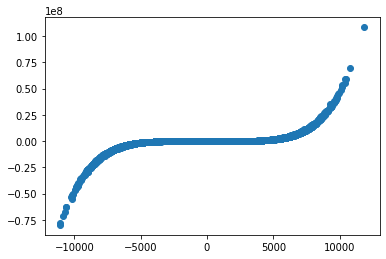

In [47]:
plt.scatter(polynomial_train['A'],polynomial_train['label'])

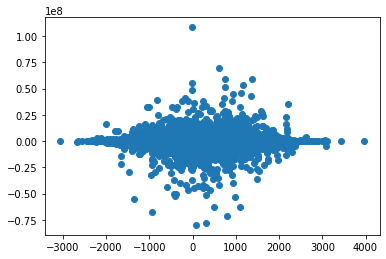

In [48]:

plt.scatter(polynomial_train['B'],polynomial_train['label'])

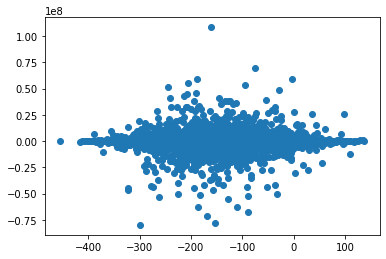

In [49]:
plt.scatter(polynomial_train['C'],polynomial_train['label'])

In [50]:
polynomial_train_normalized = polynomial_train.copy()
for column in polynomial_train_normalized.columns:
  if column!='label' and column!='0':
    polynomial_train_normalized[column] = (polynomial_train_normalized[column]-polynomial_train_normalized[column].mean())/polynomial_train_normalized[column].std()

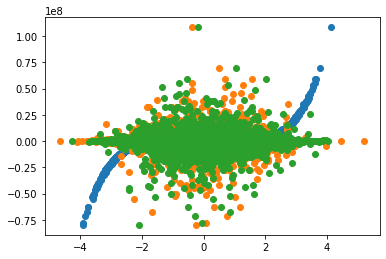

In [51]:
plt.scatter(polynomial_train_normalized['A'],polynomial_train_normalized['label'])
plt.scatter(polynomial_train_normalized['B'],polynomial_train_normalized['label'])
plt.scatter(polynomial_train_normalized['C'],polynomial_train_normalized['label'])

In [52]:
class PolynomialRegression:  
    def __init__(self,deg,learning_rate=0.001,iter=10000):
      self.lr = learning_rate
      self.iter=iter
      self.W = None 
      self.b = None
      self.deg = deg
    def Polyfeatures(self,X):
      n_samples = X.shape[0]
      n_features = X.shape[1] #taking it as 3 from the dataset
      X_poly = np.ones((n_samples,1))
      if self.deg>=2 :
        #               1,a,b,c,a**2,b**2,c**2,ab,bc,ca
        X_poly = np.c_[X_poly,X,X**2,X[:,0]*X[:,1],X[:,0]*X[:,2],X[:,1]*X[:,2]]
      if self.deg>=3:
        #                       a**3,b**3,c**3,bca
        X_poly = np.c_[X_poly,X**3,X[:,0]*X[:,1]*X[:,2]]
      return X_poly
      """ for a in range(0,self.deg+1):
        print("ok1")
        for b in range(0,self.deg+1):
          print("ok2")
          for c in range(0,self.deg+1):
            print("ok3")
            if a+b+c>=1 and a+b+c<=self.deg:
              X_temp = (X[:,0]**a)*(X[:,1]**b)*(X[:,2]**c)
              X_poly = np.c_[X_poly,X_temp] """
      return X_poly
    def fit(self,X,Y):
      n_samples = X.shape[0]
      X_poly = self.Polyfeatures(X)
      n_features_poly = X_poly.shape[1]
      costs = []
      self.W = np.random.randn(n_features_poly)
      self.b = 0
      for i in range(self.iter):
          cost =(1/(2*n_samples))*np.sum((np.dot(X_poly,self.W) + self.b - Y)**2)
          costs.append(cost)
          self.dJ = np.dot(X_poly,self.W) + self.b - Y
          self.W -=(1/n_samples)*self.lr*(np.dot(X_poly.T,self.dJ))
          self.b -=(1/n_samples)*self.lr*(np.sum(self.dJ))
          if i%1000==0:
            print("Cost after {}th operation is : {}".format(i,cost))
      plt.plot(np.arange(self.iter),costs,'r',5)
    def predict(self,X):
      X_poly = self.Polyfeatures(X)
      n_features_poly = X_poly.shape[1]
      y_predicted = np.dot(X_poly,self.W)+self.b
      return y_predicted


In [53]:
ratio = 0.80
polynomial_train_normalized=polynomial_train_normalized.sample(frac=1)
total_rows = polynomial_train_normalized.shape[0]
total_train = int(total_rows*ratio)
print(total_rows)
print(total_train)

50000
40000


In [54]:
X_train=  polynomial_train_normalized.iloc[:total_train,1:4].to_numpy()
X_test =  polynomial_train_normalized.iloc[total_train:,1:4].to_numpy()
Y_train = polynomial_train_normalized.iloc[:total_train,-1].to_numpy()
Y_test =  polynomial_train_normalized.iloc[total_train:,-1].to_numpy()

In [55]:
X_train.shape

(40000, 3)

Cost after 0th operation is : 3395232116256.327
Cost after 1000th operation is : 534583753449.40753
Cost after 2000th operation is : 442791532428.0188
Cost after 3000th operation is : 399855221120.03046
Cost after 4000th operation is : 379764937751.8716
Cost after 5000th operation is : 370363358798.3581
Cost after 6000th operation is : 365963497413.8827
Cost after 7000th operation is : 363904340696.7499
Cost after 8000th operation is : 362940628917.3532
Cost after 9000th operation is : 362489594278.8695
Cost after 10000th operation is : 362278500097.6558
Cost after 11000th operation is : 362179702707.08954
Cost after 12000th operation is : 362133462791.62274
Cost after 13000th operation is : 362111821129.98224
Cost after 14000th operation is : 362101692144.2713
Cost after 15000th operation is : 362096951439.2625
Cost after 16000th operation is : 362094732622.71246
Cost after 17000th operation is : 362093694135.268
Cost after 18000th operation is : 362093208083.6335
Cost after 19000th o

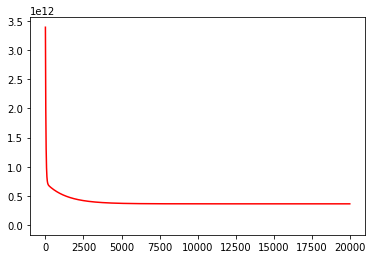

In [61]:
model = PolynomialRegression(deg=3,iter=20000)
#ans = model.Polyfeatures(X_train)
#ans[0]
model.fit(X_train,Y_train)

In [57]:
model.W

array([-2.97964364e+01, -1.21526801e+06,  2.59726512e+04,  7.76414794e+03,
        1.80398259e+04,  1.22625627e+03, -2.87918197e+03,  1.01787267e+04,
       -1.96358117e+04,  1.04338013e+03,  8.48855552e+05, -3.37106789e+02,
        9.72185453e+02, -3.76206127e+03])

In [58]:
Y_pred = model.predict(X_test)
Y_mean = Y_test.mean()
R2 = 1- (np.sum(np.square(Y_test-Y_pred)))/(np.sum(np.square(Y_test-Y_mean)))
print(R2)

0.8993455271178434


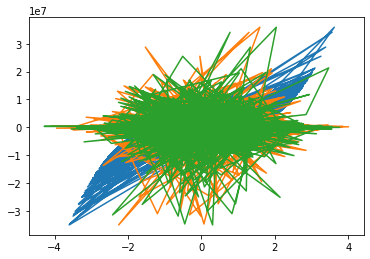

In [59]:
plt.plot(X_test,Y_pred)

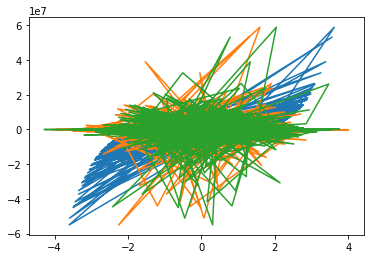

In [60]:
plt.plot(X_test,Y_test)